<a href="https://colab.research.google.com/github/Anastas1aMakarova/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия "Forty soybean cultivars from subsequent harvests"
https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests

# Регрессионный анализ

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('forty.csv')

In [ ]:
df.pop('Cultivar')

0         NEO 760 CE
1         NEO 760 CE
2         NEO 760 CE
3         NEO 760 CE
4          MANU IPRO
           ...      
315    FTR 4288 IPRO
316    FTR 3190 IPRO
317    FTR 3190 IPRO
318    FTR 3190 IPRO
319    FTR 3190 IPRO
Name: Cultivar, Length: 320, dtype: object

In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))
print(f'Размерность набора данных: ', df.shape)
print('Размерность, нумерация и не числовые значения набора данных:\n', df.info())
print('Статистики набора данных:\n', df.describe())
print('Количество уникальных значений для каждого столбца:\n', df.nunique())

Total number of rows in dataset = 320
Total number of columns in dataset = 10
Размерность набора данных:  (320, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Repetition  320 non-null    int64  
 2   PH          320 non-null    float64
 3   IFP         320 non-null    float64
 4   NLP         320 non-null    float64
 5   NGP         320 non-null    float64
 6   NGL         320 non-null    float64
 7   NS          320 non-null    float64
 8   MHG         320 non-null    float64
 9   GY          320 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 25.1 KB
Размерность, нумерация и не числовые значения набора данных:
 None
Статистики набора данных:
            Season  Repetition          PH       IFP         NLP         NGP  \
count  320.000000  320.000000  320.000000  320.0000  320.000000

In [ ]:
df.head()

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [ ]:
target_col = "Season"

In [ ]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [ ]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [ ]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
results.params

const         0.112111
Repetition    0.007454
PH            0.017961
IFP          -0.044299
NLP           0.009800
NGP          -0.001479
NGL           0.039378
NS           -0.173026
MHG           0.006148
GY            0.000010
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Season   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     26.26
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.34e-30
Time:                        10:55:40   Log-Likelihood:                -79.204
No. Observations:                 224   AIC:                             178.4
Df Residuals:                     214   BIC:                             212.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1121      0.376      0.298      0.7

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 2.7089

>b1 = 0.0441
>b2 = 0.1993
>b3 = 0.0069


2. Коэффициент детерминации R-squared = 0.906, его скорректированная оценка Adj. R-squared = 0.903 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 434,5

>расчетный уровень значимости Prob (F-statistic) = 1.88e-69

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b3 превышает 0.05. Нулевая гипотеза не отвергается. b3 не является значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b3 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err.

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
residual = y_test - y_pred

# Наличие линейной зависимости


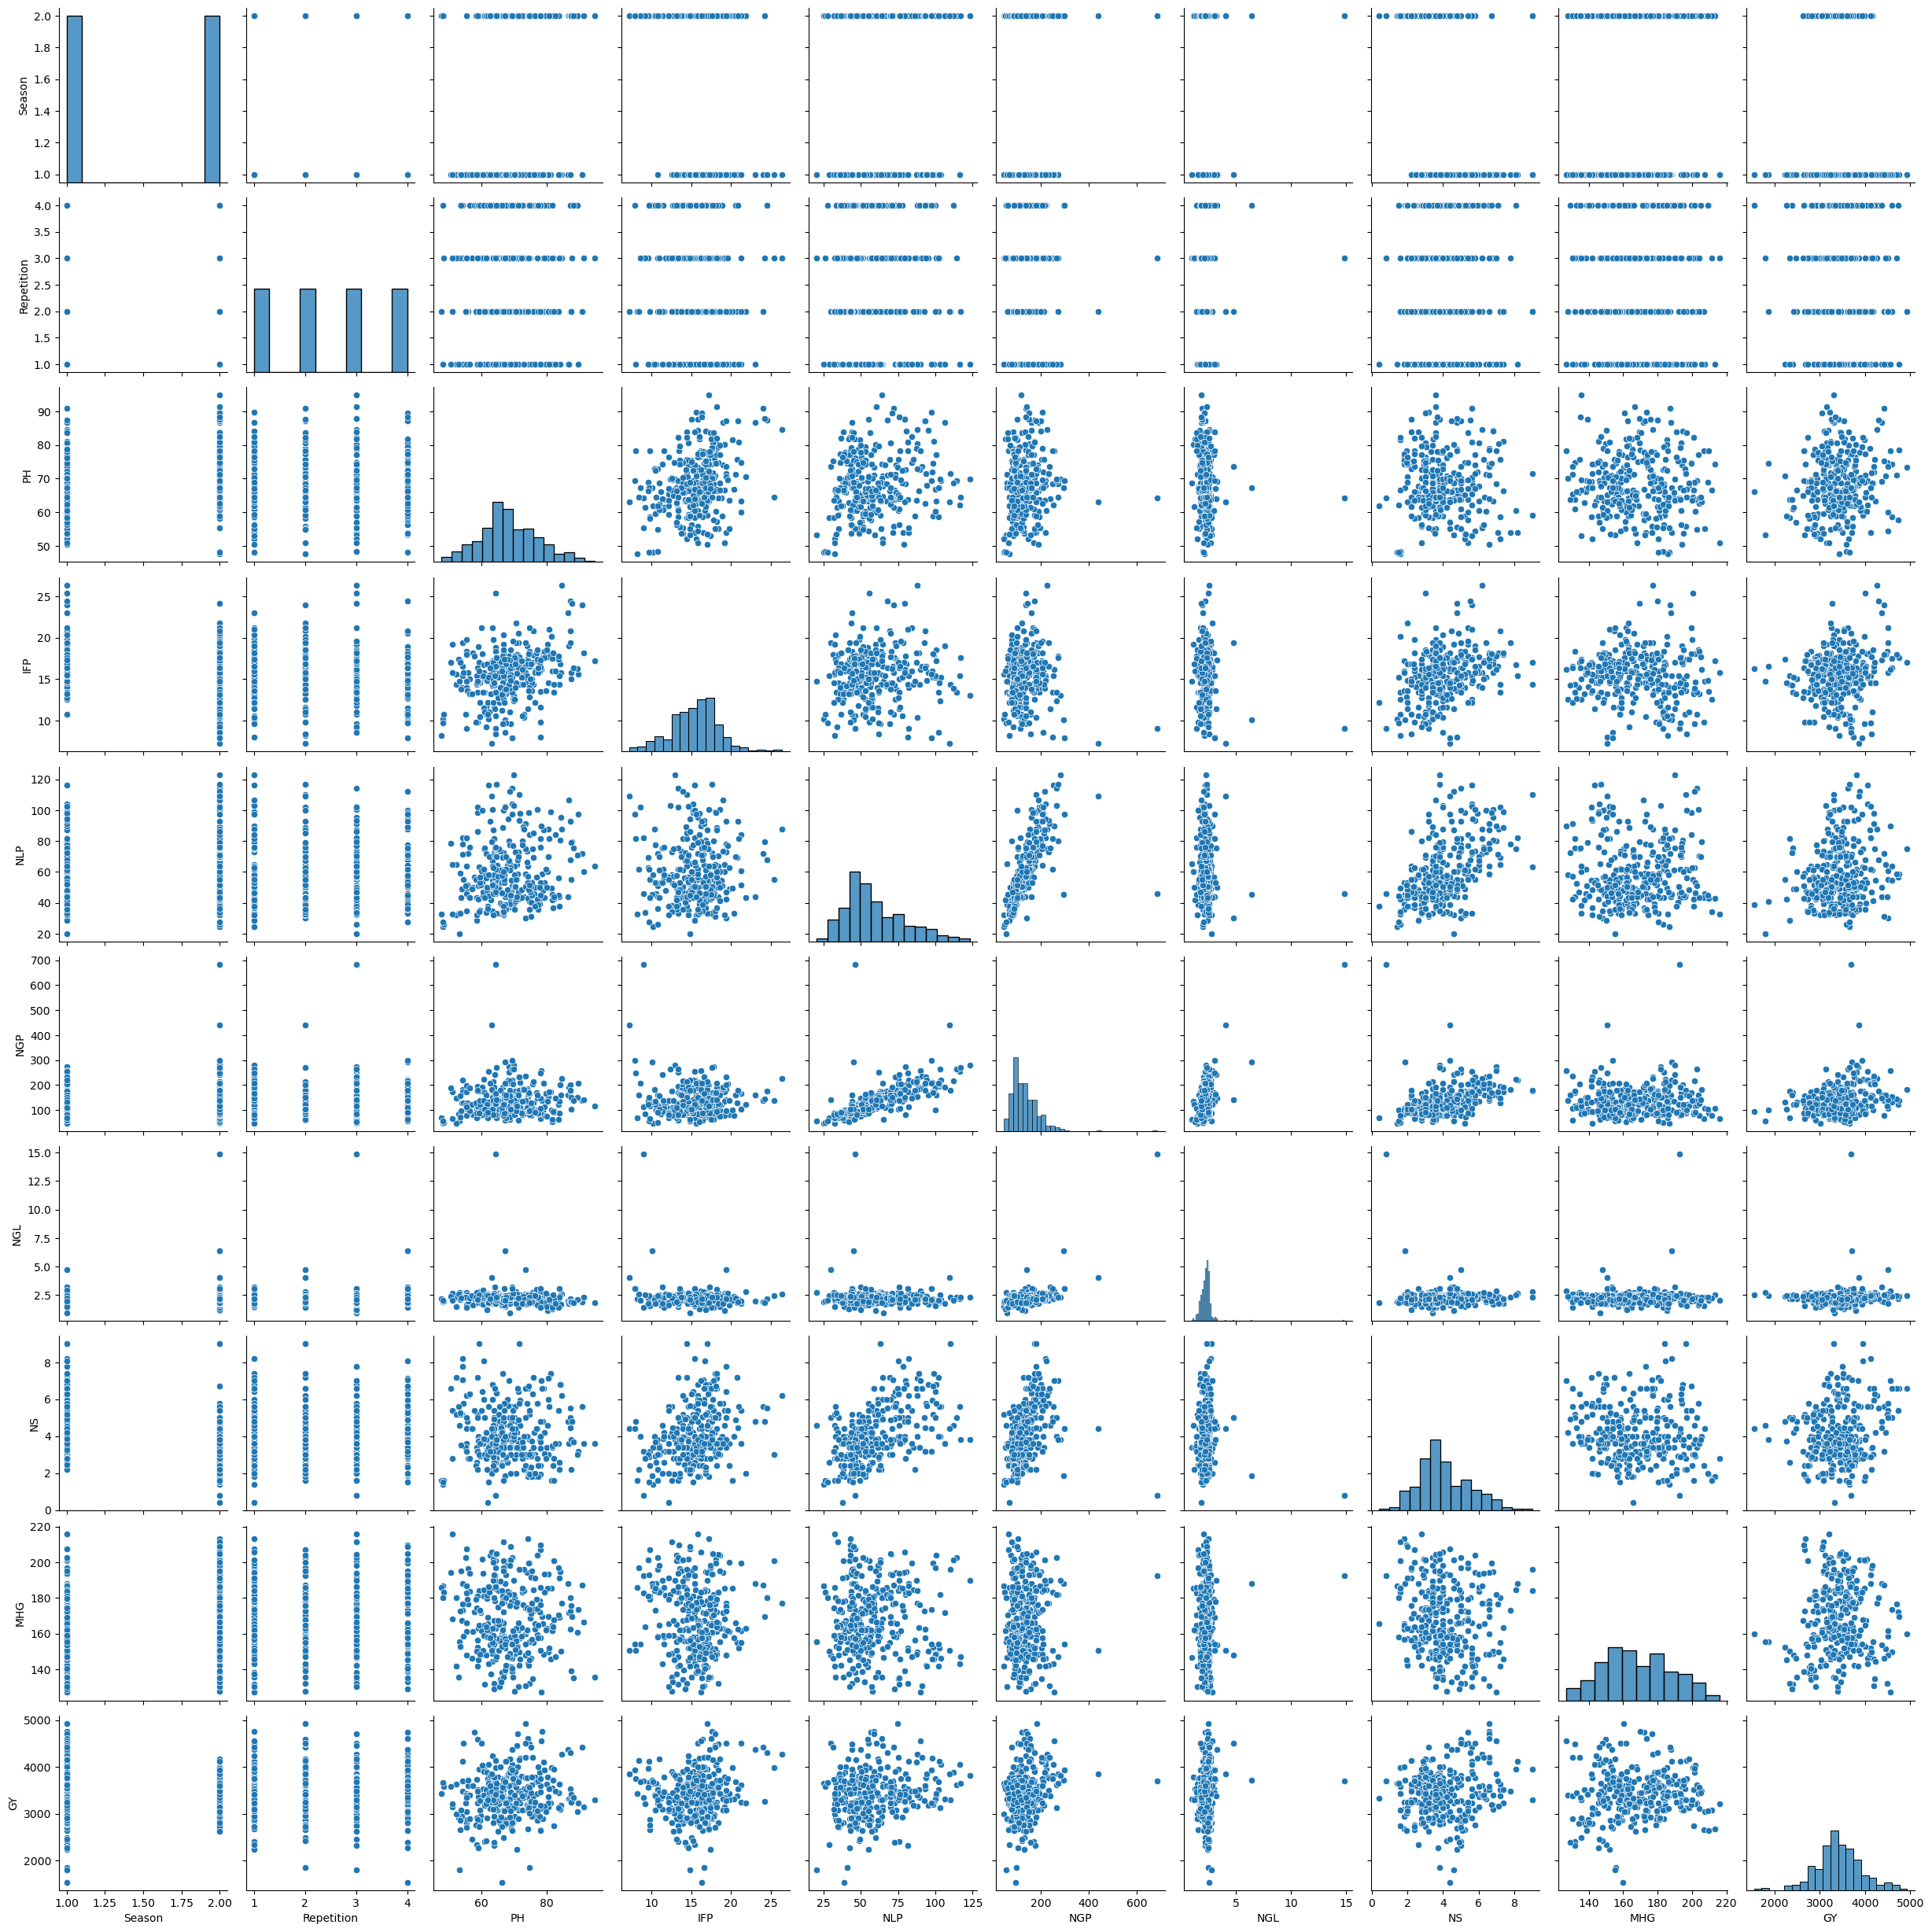

In [ ]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

In [ ]:
cols_num = ['NGP', 'NGL', 'GY']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,NGP,NGL,GY
NGP,1.000000,0.621507,0.238883
NGL,0.621507,1.000000,0.077404
GY,0.238883,0.077404,1.000000


<Axes: >

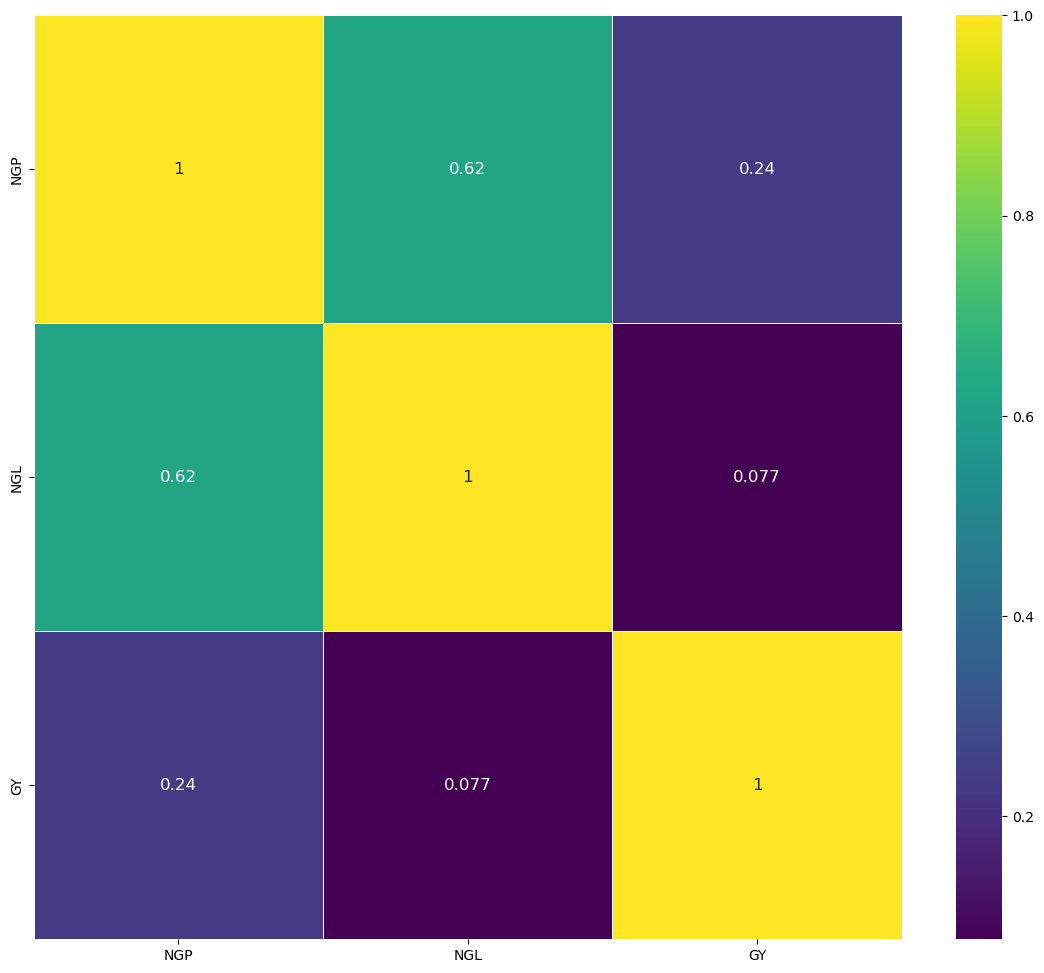

In [ ]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [ ]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
vif,6.080218,60.03079,37.397738,59.006162,53.205401,37.076845,15.242542,49.406354,47.782586


# Нормальное распределение ошибок

<Axes: ylabel='Density'>

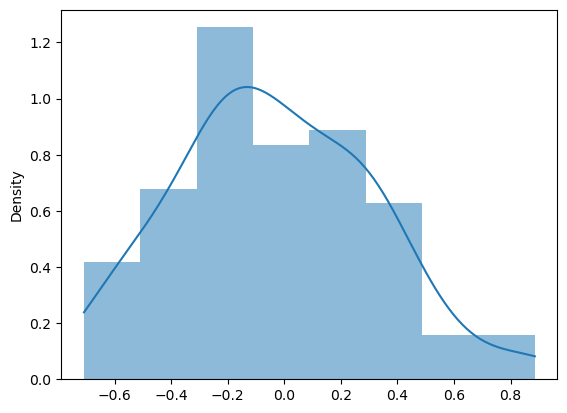

In [ ]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

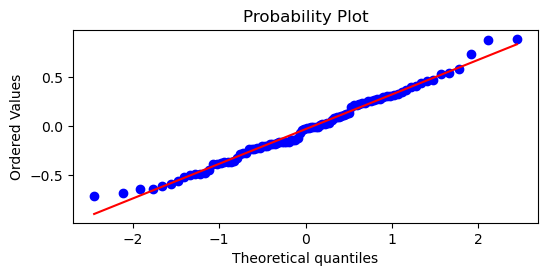

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
np.mean(residual)

-0.031858684126958726

# Гомоскедаcтичность

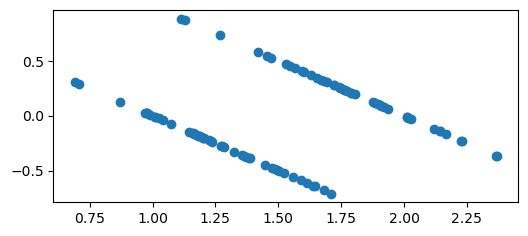

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_9364\4162568235.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


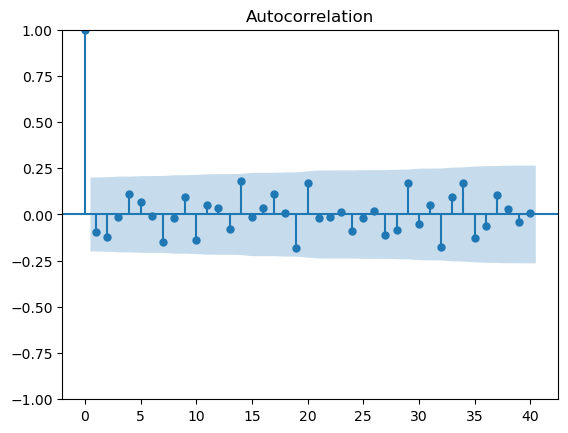

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

# Линейная регрессия (sklearn)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)

[ 7.45395564e-03  1.79614262e-02 -4.42989220e-02  9.80031927e-03
 -1.47865362e-03  3.93781710e-02 -1.73026310e-01  6.14815873e-03
  1.04293836e-05]
